In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import unicodedata
# from contractions import CONTRACTION_MAP
import spacy
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import sent_tokenize 
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
movies = pd.read_csv('/content/gdrive/My Drive/FTMLE - Tonga/Data/movie_review.csv', sep='\t')

In [0]:
m_test = pd.read_csv('/content/gdrive/My Drive/FTMLE - Tonga/Data/movie_review_evaluation.csv', sep='\t')

###EDA

In [0]:
movies.groupby(by='sentiment').describe()

id         ...                                             review     
           count unique  ...                                                top freq
sentiment                ...                                                        
0          11222  11222  ...  This show comes up with interesting locations ...    3
1          11278  11278  ...  Red Skelton was still another major star who m...    2

[2 rows x 8 columns]

In [0]:
movies['review'].sample(10)

19128    I honestly can't believe what passes for enter...
21674    Lost holds something interesting for everyone....
18470    I had started to lose my faith in films of rec...
12797    If ever there was a film that deserved a big f...
2287     Movie about a small town with equal numbers of...
11990    I don't know much about Tobe Hooper, or why he...
14769    Japan 1918. The story of 16-year old Ryu begin...
16402    What an absolute pile of pants. Having read Ch...
4432     Rarely do I see a film that I am totally engro...
9104     Follow-up to 1973's far better \Cleopatra Jone...
Name: review, dtype: object

In [0]:
movies['length'] = movies['review'].apply(len)

Text(0.5, 0, 'Length of review')

<Figure size 720x360 with 0 Axes>

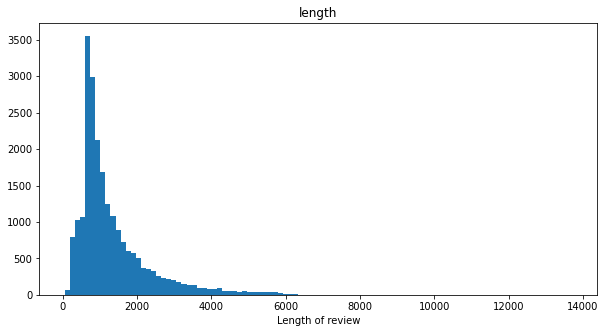

In [0]:
plt.figure(figsize=(10,5))
movies.hist(column='length', bins=100, figsize=(10,5), grid=False)
plt.xlabel('Length of review')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc055053400>,
      dtype=object)

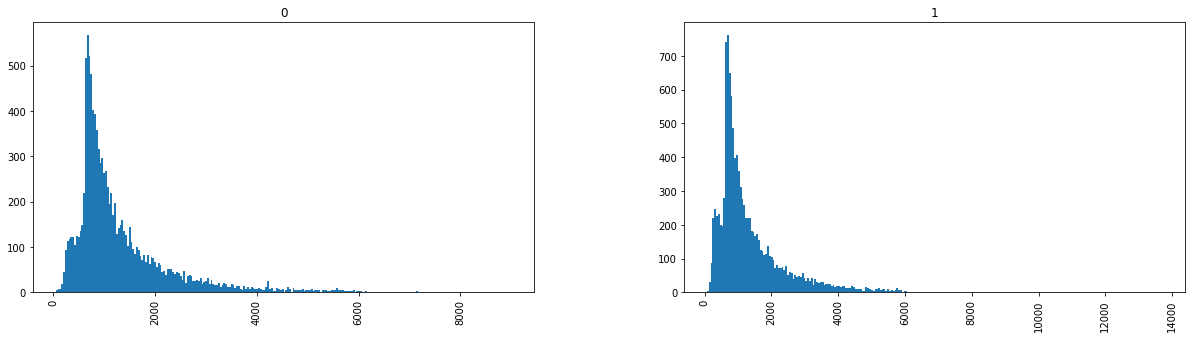

In [0]:
movies.hist(bins=250,by='sentiment',column='length', figsize=(20,5))

###Text Processing

In [0]:
def text_process(text):
  nopunc = ''.join([char.lower() for char in text if char not in string.punctuation]).split() #remove punctuation , split each word
  ps = PorterStemmer() #loving loved loves become love
  # nopunc = re.split('\W+',nopunc.lower())
  review = [ps.stem(word) for word in nopunc if word not in stopwords.words('english')] #remove stopwords

  return review 

In [0]:
def txt_processing(text):
  accented_char = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore') #converting é to e
  special_char = re.sub(r'[^A-Za-z0-9\s]', '', accented_char) # A123@122 becomes A123122
  ps = PorterStemmer() #loving loved loves become love
  lemmatizer = WordNetLemmatizer()
  # special_char = sent_tokenize(special_char)
  stopw = [ps.stem(word) for word in special_char.split() if word not in stopwords.words('english')] #remove stopwords,
  # lem = [lemmatizer.lemmatize(word) for word in stopw]
  return ' '.join(stopw)

In [0]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(movies['review'][:1000])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

15571


In [0]:
print(bow_transformer.get_feature_names())

['0', '001', '007', '010', '01000', '0130', '03', '089', '09', '1', '10', '100', '1000', '10000', '100yard', '101', '1010', '103', '104', '1050', '1072007', '108', '109', '10br', '10page', '10x10', '11', '110', '112', '112413', '11br', '12', '120', '12000000', '120page', '123', '12br', '12m', '13', '138', '13th', '14', '1416', '145', '147', '147br', '14th', '14yearoldgirl', '15', '150', '1500sbr', '15odd', '15th', '16', '1600', '1617', '165m', '166', '16ã¨me', '17', '17year', '18', '1800', '1830', '1851br', '1880', '1886', '1895br', '1898', '18th', '1907', '1914', '1920', '1924', '1928', '1930', '1930sera', '1931', '1933', '1934', '1935', '1936', '19361946', '1937', '1937br', '1938', '1939', '193940', '1940just', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1965', '1966', '1967', '1968', '1969', '1970', '1970year', '1971', '1971br', '1972', '1972br', '1973

In [0]:
reviews_bow = bow_transformer.transform(movies['review'][:1000])
bow = pd.DataFrame(reviews_bow.toarray())
bow.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,15531,15532,15533,15534,15535,15536,15537,15538,15539,15540,15541,15542,15543,15544,15545,15546,15547,15548,15549,15550,15551,15552,15553,15554,15555,15556,15557,15558,15559,15560,15561,15562,15563,15564,15565,15566,15567,15568,15569,15570
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0


**Example:**

Consider a document containing 100 words wherein the word cat appears 3 times. 

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.
____



In [0]:
tfidf_transformer = TfidfTransformer().fit(reviews_bow)
review_tfidf = tfidf_transformer.transform(reviews_bow)
print(review_tfidf.shape)

(1000, 15571)


###Training model using naive bayes

**Naive Bayes** algorithm can be defined as a supervised classification algorithm which is based on Bayes theorem with an assumption of independence among features.
![alt text](https://www.globalsoftwaresupport.com/wp-content/uploads/2018/02/naivebayes8-1024x518.png)

Let's go ahead and see how we can do this in SciKit Learn:

In [0]:
detect_model = MultinomialNB().fit(review_tfidf, movies['sentiment'][:1000])

In [0]:

all_predictions = detect_model.predict(review_tfidf)
# print(all_predictions)

In [0]:
print (classification_report(movies['sentiment'][:1000], all_predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       518
           1       1.00      0.95      0.98       482

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [7]:
X_train, X_test, y_train, y_test = \
train_test_split(movies['review'], movies['sentiment'], test_size=0.2)

print(len(X_train), len(X_test), len(y_train) + len(y_test))

18000 4500 22500


###Pipeline

In [0]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [23]:
pipeline.fit(movies['review'],movies['sentiment'])

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fcb0fc4ed90>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [25]:
m_test

,id,review
0,10633_1,I watched this video at a friend's house. I'm ...
1,4489_1,`The Matrix' was an exciting summer blockbuste...
2,3304_10,This movie is one among the very few Indian mo...
3,3350_3,The script for this movie was probably found i...
4,1119_1,Even if this film was allegedly a joke in resp...
...,...,...
2495,1065_10,"Dark Angel is a futuristic sci-fi series, set ..."
2496,7261_3,This British-Spanish co-production is one of t...
2497,11075_10,"Having read the reviews for this film, I under..."
2498,2041_2,Well I'll start with the good points. The movi...


In [0]:
predictions = pipeline.predict(m_test['review'])
# print(classification_report(predictions,m_test['sentiment']))

In [29]:
predictions

array([0, 0, 1, ..., 0, 0, 1])

In [0]:
m_test['sentiment'] = pd.DataFrame(predictions) 

In [0]:

from google.colab import files
m_test.to_csv('thomas.csv',index=False)
files.download('thomas.csv')